# SVM - Regression
---

- Support Vector Regression (SVR) is an extension of the Support Vector Machine (SVM) concept to handle regression problems. Just as SVM aims to find the optimal separating hyperplane for classification, SVR attempts to find a function that has at most  deviation ,$\epsilon$,  from the actually obtained targets $y$ for all the training data, and at the same time is as flat as possible.

## Basic Concept

- In SVR, instead of trying to find a hyperplane that separates two classes, the goal is to fit a hyperplane in a high-dimensional space that deviates from the actual continuous target values as little as possible for all training points, while remaining as flat as possible.

## Linear SVM

- The hyperplane can be described mathematically as:
\begin{equation}
f(x) = w \cdotp x+b
\end{equation}

Where:

$w$ is the weight vector perpendicular to the hyperplane.

$x$ is the input data vector.

$b$ is the bias term, shifting the hyperplane along the weight vector.

## Objective and Constraints

The objective in SVR is to minimize:
\begin{equation}
min_{w,b}\frac{1}{2}|||w||^2 + C \cdotp \Sigma_{i=1}^n (\xi_i+\xi_i^*)
\end{equation}

Where $\xi_i$ and $\xi_i^*$ are slack variables that measure the deviation of samples that are above and below the insensitivity tube, $\epsilon$. The constraints are:
1. $y_i -(w \cdotp x_{i}+b) \leq \epsilon+\xi_i$
2. $(w \cdotp x_{i}+b)-y_i \leq \epsilon+\xi_i^*$

## Interpretation

- $\epsilon$ defines a tube within which predictions are considered acceptable (i.e., errors within this tube are ignored). The width of this tube is controlled by $\epsilon$.
- $C$ is the penalty parameter that controls the trade-off between the flatness of $𝑓(𝑥)$ and the amount up to which deviations larger than
$\epsilon$ are tolerated.

## Non-linear SVR

- For non-linear relationships, SVR uses the kernel trick to map input features into higher-dimensional feature spaces where linear regression can be performed. The kernel function replaces the dot product in the feature space, just like in SVM classification:
\begin{equation}
f(x) = \Sigma_i=1^N(\alpha_i - \alpha_i^*)\mathbf{K}(x_i,x_j)+b
\end{equation}

Note that:

1.$ \alpha_i$ and $\alpha_i^*$ Lagrange multipliers of the optimization problem.

2. $\mathbf{K}(x_i,x_j)$ is the kernel function discussed in 1-SVM-Classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, noise=1, random_state=42)

In [4]:
df = pd.DataFrame(X, columns=["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10"])
df["Y"] = y
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.604706
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,107.537952
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-114.845161
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,37.578671
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,132.104552
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.197338,-0.054894,-0.194908,-0.151273,0.521122,0.285554,1.133770,0.645216,0.089581,0.555604,106.611546
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-53.170620
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-5.974242
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.552752


In [5]:
df.corr()['Y']

X1     0.196095
X2     0.193735
X3     0.235093
X4     0.574168
X5     0.061158
X6     0.115419
X7     0.530854
X8     0.098289
X9     0.015214
X10    0.456147
Y      1.000000
Name: Y, dtype: float64

<Axes: >

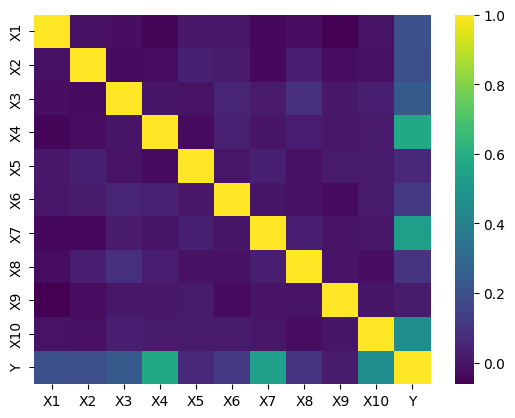

In [6]:
sns.heatmap(df.corr(),cmap='viridis')

## Train | Test Split

Alternatively you could also set this up as a pipline, something like:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [7]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y'], dtype='object')

In [10]:
X = df.drop('Y',axis=1)
y = df['Y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [16]:
from sklearn.svm import SVR,LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [17]:
base_model = SVR()

In [18]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [19]:
base_preds = base_model.predict(scaled_X_test)

## Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mean_absolute_error(y_test,base_preds)

90.10997639302022

In [22]:
np.sqrt(mean_squared_error(y_test,base_preds))

115.13683456186456

In [23]:
y_test.mean()

-4.104777371981597

## Grid Search in Attempt for Better Model

In [24]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [27]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [29]:
grid_preds = grid.predict(scaled_X_test)

In [30]:
mean_absolute_error(y_test,grid_preds)

0.8252397182326967

In [31]:
np.sqrt(mean_squared_error(y_test,grid_preds))

1.0137169311803025

Great improvement!